# GENFI project
**Date:** 10/07/2023

**Author:** Dr. Siddharth Ramanan, MRC Cognition and Brain Sciences Unit, University of Cambridge, UK

## Project details

**Overall aims and methods:** Examine cognitive, clinical and behavioural heterogeneity in frontotemporal dementia gene carriers

**People involved:** Siddharth Ramanan (lead), Danyal Akarca, James B. Rowe, Matthew A. Lambon Ralph + GENFI collaborators

**Dataset description:** Data are from Data Freeze 6. Having a quick look at the Excel files that James has emailed over (22/6/23), there are 5 data files in total:
- Biosamples
- Clinical
- Demographics
- Imaging
- Neuropsychology

**Data dictionary:** There doesn't seem to be one. There are legends and codes embedded in the excel sheet (e.g., if 0 then presymptomatic, etc.) but these aren't being read properly into the df. Best to document these as we go.

**Issues to be aware of:**

**Location of files:** C:\Users\sr06\ownCloud\Projects\In Progress\GENFI_JBR. This link contains subfolders for:
- Code
- Data
- Data request form
- Manuscript and figures

## Read data and load relevant packages

In [103]:
# load relevant packages
import numpy as np # import numpy
import pandas as pd # import pandas library for data wrangling
import matplotlib # import matplotlib library for plotting
from matplotlib import pyplot as plt # import pyplot from matplotlib library for plotting
%matplotlib inline 
import random # import random library
import sklearn as sklearn # import sklearn library
import seaborn as sns # import seaborn for plotting
from IPython.display import display #  for displaying data
pd.options.display.max_columns = None # to show all cols when viewing data

Having a quick look at the Excel files from data freeze 6 that James has emailed over (22/6/23), there are 5 data files in total:
- Biosamples
- Clinical
- Demographics
- Imaging
- Neuropsychology

Each of these Excel files has two sheets (GENFI1 and GENFI2) corresponding to each wave of the GENFI, with the same colnames. When I looked at some of the IDs (e.g., GRN161) they have different dates of assessment between GENFI1 and GENFI2 which leads me to believe that GENFI2 is an extension of GENFI1, with no replication of time-stamped data between these two sheets. I will import both sheets and concatenate them together. Where Visit values < 10, source is GENFI1 else GENFI2. Later, I'll repeat these steps for other variables and then left join them with genfi_dem as and when needed.

In [104]:
# I will import all the five datasets, concatenate across GENFI1 & GENFI2 sheets and then left_join them.

# import demographics data
all_genfi_dem = pd.read_excel("../Data/FINAL_BLINDED_GENFI_DEMOGRAPHICS_DF6.xlsx", sheet_name=None)

# import clinical data
all_genfi_clinical = pd.read_excel("../Data/FINAL_BLINDED_GENFI_CLINICAL_DF6.xlsx", sheet_name=None)

# import neuropsych data
all_genfi_neuropsy = pd.read_excel("../Data/FINAL_BLINDED_GENFI_NEUROPSYCH_DF6.xlsx", sheet_name=None)

# import imaging data
all_genfi_imaging = pd.read_excel("../Data/FINAL_BLINDED_GENFI_IMAGING_DF6.xlsx", sheet_name=None)

# import biosamples data
all_genfi_biosamp = pd.read_excel("../Data/FINAL_BLINDED_GENFI_BIOSAMPLES_DF6.xlsx", sheet_name=None)

In [105]:
# for all dfs, check if both sheets are read in
all_genfi_dem.keys();
all_genfi_clinical.keys();
all_genfi_neuropsy.keys();
all_genfi_imaging.keys();
all_genfi_biosamp.keys()

dict_keys(['GENFI 1', 'GENFI 2'])

In [106]:
# For all dfs, concatenate both sheets into one df

# demographics
genfi_dem = pd.concat(all_genfi_dem, ignore_index=True);
genfi_dem.head(20)
# to visualise the full dataset, use the code below but be aware it is computationally expensive.
#pd.options.display.max_columns = None
#pd.options.display.max_rows = None
#display(genfi_dem)

,Blinded Code,Blinded Site,Visit,Date of assessment,Genetic Group,Mutation,Blinded Family,Genetic status 1,Genetic status 2,Awareness of genetic status,DOB,Gender,Handedness,Education,Employment,Ethnicity,Mean family AAO,Age at visit,EYO,Mother Affected,Diagnosis,AAO,AAD,Father Affected,Diagnosis.1,AAO.1,AAD.1,No_of_sibs,No_of_affected_sibs,Diagnosis_1,AAO_1,AAD_1,Diagnosis_2,AAO_2,AAD_2,Diagnosis_3,AAO_3,AAD_3,Diagnosis_4,AAO_4,AAD_4,Diagnosis_5,AAO_5,AAD_5,Diagnosis_6,AAO_6,AAD_6,Diagnosis_7,AAO_7,AAD_7,Diagnosis_8,AAO_8,AAD_8,Mean Family AAO
0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,"At-risk (P), Symp (A)","Neg (0), Pos (1 or 2)","0=not aware, 1=aware, 99=missing",NaT,"0=F, 1=M","0=R, 1=L",Years,NaN,NaN,NaN,Years,NaN,1=affected; 2 = unknown,NaN,NaN,2= still alive,1=affected; 2 = unknown,NaN,NaN,2= still alive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GRN001,GENFI_YD,1.0,2012-01-30,GRN,G35fs,FAM449,P,0,0,1984-03-14,0,1,16,0.0,0.0,56.0,27.879535,-28.120465,1,PPA,56.0,2,0,NaN,NaN,NaN,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GRN001,GENFI_YD,2.0,2013-06-21,GRN,G35fs,FAM449,P,0,0,1984-03-14,0,1,16,0.0,0.0,56.0,29.270363,-26.729637,1,PPA,56.0,61,0,NaN,NaN,NaN,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GRN023,GENFI_YD,1.0,2012-01-31,GRN,R493X,FAM484,P,0,0,1947-05-01,0,0,16,2.0,0.0,59.0,64.752909,5.752909,0,NaN,NaN,NaN,0,NaN,NaN,NaN,2.0,1.0,PPA,59.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GRN023,GENFI_YD,2.0,2013-01-29,GRN,R493X,FAM484,P,0,0,1947-05-01,0,0,16,2.0,0.0,59.0,65.749487,6.749487,0,NaN,NaN,NaN,0,NaN,NaN,NaN,2.0,1.0,PPA,59.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,GRN023,GENFI_YD,3.0,2014-03-17,GRN,R493X,FAM484,P,0,0,1947-05-01,0,0,16,2.0,0.0,59.0,66.877481,7.877481,0,NaN,NaN,NaN,0,NaN,NaN,NaN,2.0,1.0,PPA,59.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,MAPT027,GENFI_YD,1.0,2012-02-14,MAPT,IVS10+16,FAM359,P,1,1,1970-07-21,0,0,17,0.0,0.0,45.0,41.568789,-3.431211,1,bvFTD,45.0,52,0,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,MAPT027,GENFI_YD,2.0,2013-04-02,MAPT,IVS10+16,FAM359,P,1,1,1970-07-21,0,0,17,0.0,0.0,45.0,42.699521,-2.300479,1,bvFTD,45.0,52,0,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,MAPT027,GENFI_YD,3.0,2014-04-08,MAPT,IVS10+16,FAM359,P,1,1,1970-07-21,0,0,17,0.0,0.0,45.0,43.715264,-1.284736,1,bvFTD,45.0,52,0,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,C9ORF052,GENFI_YD,1.0,2012-02-23,C9orf72,NaN,FAM973,A,2,1,1943-10-10,1,0,16,2.0,0.0,55.5,68.372348,12.872348,1,Dementia-NOS,63.0,87,0,NaN,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
# clinical
genfi_clinical = pd.concat(all_genfi_clinical, ignore_index=True);
genfi_clinical.head(20)

,Blinded Code,Blinded Site,Visit,Genetic Group,Mutation,Affected,Age at Onset,First symptom,First symptom.1,First symptom.2,Diagnosis,Rascovsky,Gorno-Tempini,El-Escorial,Affected.1,Disinhibition,Apathy,Empathy,OCD,Appetite,Affected.2,Vis_hal,Aud_hal,Tac_hal,Delusions,Depression,Anxiety,Affected.3,Artic,Fluency,Grammar,Retrieval,Repetition,Sent_comp,Word_comp,Dyslexia,Dysgraphia,Func_comm,Affected.4,Memory,Visuospatial,Judg_prob_solv,Attention,Affected.5,Dysarthria,Dysphagia,Tremor,Slowness,Weakness,Gait,Falls,Seizures,Stroke,TBI,Hypertension,Hyperchol,Diabetes,EMG,Supranuclear,Bulbar,Pseudobulbar,Myoclonus,Rest_tremor,Post_tremor,Dystonia,Bradykinesia,Rigidity,Limb_apraxia,Alien_limb,Fascic_UL,Fascic_LL,Spasticity_UL,Spasticity_LL,Weakness_UL,Weakness_LL,Hyperreflexia_UL,Hyperreflexia_LL,Ataxia,Abnormal_gait,Type,Severity,Memory.1,Everyday_Skills,Self_Care,Abnormal_Behaviour,Mood,Beliefs,Eating,Sleep,Stereotypic_Behaviour,Motivation,CBI_Total,FRS_%,ALSFRS_total,Genetic status 1,Genetic status 2,FTLD-CDR-SOB,FTLD-CDR-GLOBAL,CDR-SOB,GENFI-CDR-SOB,GENFI-CDR-GLOBAL,BEHAV-SOB,PASS-SOB,Behaviour,Emotions,Trusting,Neuropsych,Lability,Aggression,Euphoria,Aberr_motor,Hypersexuality,Hyperreligiousity,Humour,Language,Cognitive,Orientation,Comm_affairs,Hobbies,Personal_care,Person_recog,Topo_memory,Bradyphrenia,Motor,Hands,Affected.6,Autonomic,BP,Gastro,Thermo,Urinary,Pain,Affected.7,Sounds,Smell,Unexplained,Breathing,Smoking,Alcohol,Rec_drugs,Autoimmune,Drug_history,No_of_drugs,MMSE,Eyelid,Face_weakness,Neck_weakness,Neck_rigidity,Resp_weakness,Myoclonus_L,Myoclonus_R,Rest_tremor_L,Rest_tremor_R,Post_tremor_L,Post_tremor_R,Dystonia_L,Dystonia_R,Chorea_L,Chorea_R,Bradykinesia_UL_L,Bradykinesia_UL_R,Bradykinesia_LL_L,Bradykinesia_LL_R,Rigidity_L,Rigidity_R,Limb_apraxia_L,Limb_apraxia_R,Alien_limb_L,Alien_limb_R,Cortical_sensory_L,Cortical_sensory_R,Fascic_UL_L,Fascic_UL_R,Fascic_LL_L,Fascic_LL_R,Spasticity_UL_L,Spasticity_UL_R,Spasticity_LL_L,Spasticity_LL_R,Weakness_UL_L,Weakness_UL_R,Weakness_LL_L,Weakness_LL_R,Hyperreflexia_UL_L,Hyperreflexia_UL_R,Hyperreflexia_LL_L,Hyperreflexia_LL_R,Ataxia_UL_L,Ataxia_UL_R,Ataxia_LL_L,Ataxia_LL_R,Affected.8,Arising,Sitting,Post_instability,Sleep.1,mIRI_total,mIRI_EC,mIRI_PT,RSMS_total,RSMS_EX,RSMS_SP
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,3,NaN,1=probable; 2=possible,1=NOS; 2=nfv; 3=sv; 4=lv,1=definite; 2=probable; 3=lab-supported; 4=pos...,NaN,B1,B2,B3,B4,B5,NaN,C1,C2,C3,C4,C5,C6,NaN,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,NaN,E1,E2,E3,E4,NaN,F1,F2,F3,F4,F5,F6,F7,1 = recent/active; 2 = remote/inactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1 = Present: L>R, 2 = Present: R>L, 3 = Presen...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C9ORF001,GENFI_AA,1.0,C9orf72,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,999.0,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [108]:
# neuropsych
genfi_neuropsy = pd.concat(all_genfi_neuropsy, ignore_index=True);
genfi_neuropsy.head(20)

,Blinded Code,Blinded Site,Visit,Language,MMSE,Log_memory_immediate,DS_F_score,DS_F_max,DS_B_score,DS_B_max,TMTA_time,TMTA_errors,TMTA_lines,TMTB_time,TMTB_errors,TMTB_lines,Digit_symbol,Boston_naming,VF_animals,VF_vegetables,VF_F,VF_A,VF_S,Log_memory_delayed,Log_memory_time,Block_design,Genetic status 1,Genetic status 2,Benson_figure_copy,C+C,Benson_figure_recall,Copy_recall_time,Benson_recognition,FCRST_free,FCRST_total,Stroop_color_uerrors,Stroop_color_scerrors,Stroop_color_time,Stroop_word_uerrors,Stroop_word_scerrors,Stroop_word_time,Stroop_ink_uerrors,Stroop_ink_scerrors,Stroop_ink_time,FCRST_del_free,FCRST_del_total,Faux_pas_totalFP,Faux_pas_totalNFP,Faux_pas_totalALL,Faux_pas_SUBSCORE,Ekman_happiness,Ekman_surprise,Ekman_disgust,Ekman_fear,Ekman_anger,Ekman_sadness,Ekman_neutral,Ekman_all,Ekman_SUBSCORE,MiniSEA_total,Unnamed: 55
0,NaN,NaN,NaN,NaN,30.0,25.0,12.0,8.0,12.0,7.0,150.0,NaN,24.0,300.0,NaN,24.0,100.0,30.0,NaN,NaN,NaN,NaN,NaN,25.0,NaN,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C9ORF001,GENFI_AA,1.0,0.0,29.0,12.0,6.0,5.0,3.0,3.0,22.0,0.0,24.0,55.0,0.0,24.0,60.0,27.0,20.0,13.0,9.0,8.0,14.0,9.0,23.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C9ORF001,GENFI_AA,2.0,0.0,30.0,15.0,7.0,6.0,4.0,3.0,24.0,0.0,24.0,73.0,1.0,24.0,56.0,26.0,21.0,16.0,10.0,6.0,12.0,14.0,19.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C9ORF002,GENFI_AA,1.0,0.0,29.0,14.0,11.0,8.0,10.0,7.0,22.0,0.0,24.0,43.0,0.0,24.0,67.0,27.0,18.0,12.0,15.0,9.0,21.0,14.0,20.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C9ORF002,GENFI_AA,2.0,0.0,30.0,17.0,10.0,8.0,12.0,7.0,20.0,0.0,24.0,49.0,0.0,24.0,77.0,30.0,17.0,11.0,10.0,12.0,11.0,17.0,19.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,C9ORF003,GENFI_GX,1.0,0.0,29.0,20.0,8.0,7.0,9.0,6.0,17.0,0.0,24.0,49.0,1.0,24.0,92.0,30.0,25.0,17.0,16.0,12.0,17.0,21.0,20.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,C9ORF003,GENFI_GX,2.0,0.0,30.0,20.0,8.0,7.0,8.0,5.0,13.0,0.0,24.0,40.0,0.0,24.0,93.0,30.0,21.0,20.0,14.0,24.0,20.0,21.0,21.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,C9ORF004,GENFI_MB,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,C9ORF005,GENFI_IS,1.0,1.0,23.0,3.0,6.0,5.0,3.0,3.0,51.0,0.0,24.0,300.0,NaN,NaN,21.0,23.0,6.0,7.0,9.0,4.0,4.0,3.0,20.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,C9ORF006,GENFI_IS,1.0,1.0,30.0,12.0,7.0,6.0,6.0,4.0,17.0,0.0,24.0,64.0,0.0,24.0,77.0,26.0,26.0,15.0,15.0,10.0,12.0,10.0,10.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
# imaging
genfi_imaging = pd.concat(all_genfi_imaging, ignore_index=True);
genfi_imaging.head(20)

,Blinded Code,Blinded Site,Visit,Date of scan,Series,Scanner,DF1,DF2,Scan_for_QC,QC_include in VBM,QC_include in GIF,DRC_QC,MB_QC_comments,Other_QC_comments,Volume1,Volume2,Volume3,GM ml,WM ml,CSF ml,TIV ml,TIV mm3,Non-Brain Outer Tissue - Background,Non-Brain Low,Non-Brain Mid,Non-Brain High,Non-ventricular CSF,3rd Ventricle,4th Ventricle,5th Ventricle,Right Accumbens Area,Left Accumbens Area,Right Amygdala,Left Amygdala,Pons,Brain Stem,Right Caudate,Left Caudate,Right Cerebellum Exterior,Left Cerebellum Exterior,Right Cerebellum White Matter,Left Cerebellum White Matter,Right Cerebral Exterior,Left Cerebral Exterior,3rd Ventricle (Posterior part),Right Hippocampus,Left Hippocampus,Right Inf Lat Vent,Left Inf Lat Vent,Right Lateral Ventricle,Left Lateral Ventricle,Right Lesion,Left Lesion,Right Pallidum,Left Pallidum,Right Putamen,Left Putamen,Right Thalamus Proper,Left Thalamus Proper,Right Ventral DC,Left Ventral DC,Right vessel,Left vessel,Right Ventricular Lining,Left Ventricular Lining,Optic Chiasm,Cerebellar Vermal Lobules I-V,Cerebellar Vermal Lobules VI-VII,Cerebellar Vermal Lobules VIII-X,Left Basal Forebrain,Right Basal Forebrain,Right Temporal White Matter,Right Insula White Matter,Right Cingulate White Matter,Right Frontal White Matter,Right Occipital White Matter,Right Parietal White Matter,Corpus Callosum,Left Temporal White Matter,Left Insula White Matter,Left Cingulate White Matter,Left Frontal White Matter,Left Occipital White Matter,Left Parietal White Matter,Right Claustrum,Left Claustrum,Right ACgG anterior cingulate gyrus,Left ACgG anterior cingulate gyrus,Right AIns anterior insula,Left AIns anterior insula,Right AOrG anterior orbital gyrus,Left AOrG anterior orbital gyrus,Right AnG angular gyrus,Left AnG angular gyrus,Right Calc calcarine cortex,Left Calc calcarine cortex,Right CO central operculum,Left CO central operculum,Right Cun cuneus,Left Cun cuneus,Right Ent entorhinal area,Left Ent entorhinal area,Right FO frontal operculum,Left FO frontal operculum,Right FRP frontal pole,Left FRP frontal pole,Right FuG fusiform gyrus,Left FuG fusiform gyrus,Right GRe gyrus rectus,Left GRe gyrus rectus,Right IOG inferior occipital gyrus,Left IOG inferior occipital gyrus,Right ITG inferior temporal gyrus,Left ITG inferior temporal gyrus,Right LiG lingual gyrus,Left LiG lingual gyrus,Right LOrG lateral orbital gyrus,Left LOrG lateral orbital gyrus,Right MCgG middle cingulate gyrus,Left MCgG middle cingulate gyrus,Right MFC medial frontal cortex,Left MFC medial frontal cortex,Right MFG middle frontal gyrus,Left MFG middle frontal gyrus,Right MOG middle occipital gyrus,Left MOG middle occipital gyrus,Right MOrG medial orbital gyrus,Left MOrG medial orbital gyrus,Right MPoG postcentral gyrus medial segment,Left MPoG postcentral gyrus medial segment,Right MPrG precentral gyrus medial segment,Left MPrG precentral gyrus medial segment,Right MSFG superior frontal gyrus medial segment,Left MSFG superior frontal gyrus medial segment,Right MTG middle temporal gyrus,Left MTG middle temporal gyrus,Right OCP occipital pole,Left OCP occipital pole,Right OFuG occipital fusiform gyrus,Left OFuG occipital fusiform gyrus,Right OpIFG opercular part of the inferior frontal gyrus,Left OpIFG opercular part of the inferior frontal gyrus,Right OrIFG orbital part of the inferior frontal gyrus,Left OrIFG orbital part of the inferior frontal gyrus,Right PCgG posterior cingulate gyrus,Left PCgG posterior cingulate gyrus,Right PCu precuneus,Left PCu precuneus,Right PHG parahippocampal gyrus,Left PHG parahippocampal gyrus,Right PIns posterior insula,Left PIns posterior insula,Right PO parietal operculum,Left PO parietal operculum,Right PoG postcentral gyrus,Left PoG postcentral gyrus,Right POrG posterior orbital gyrus,Left POrG posterior orbital gyrus,Right PP planum polare,Left PP planum polare,Right PrG precentral gyrus,Left PrG precentral gyrus,Right PT planum temporale,Left PT planum temporale,Right SCA subcallosal area,Left SCA subcallos

In [110]:
# biosamples
genfi_biosamp = pd.concat(all_genfi_biosamp, ignore_index=True);
genfi_biosamp.head(20)

,Blinded Code,Blinded Site,Visit,Plasma NfL (pg/mL),Plasma NfL source,Plasma GFAP (pg/mL),Plasma GFAP source,Plasma pNfH,Plasma pNfH source
0,C9ORF001,GENFI_AA,1.0,6.76,3.0,100.0,3.0,4.0,5.0
1,C9ORF001,GENFI_AA,2.0,5.64,3.0,88.0,3.0,8.0,5.0
2,C9ORF002,GENFI_AA,1.0,7.98,3.0,118.0,3.0,13.0,5.0
3,C9ORF002,GENFI_AA,2.0,6.29,3.0,105.0,3.0,NaN,NaN
4,C9ORF003,GENFI_GX,1.0,8.42,3.0,97.0,3.0,35.0,5.0
5,C9ORF003,GENFI_GX,2.0,10.10,3.0,107.0,3.0,31.0,5.0
6,C9ORF004,GENFI_MB,1.0,30.68,1.0,167.0,1.0,NaN,NaN
7,C9ORF005,GENFI_IS,1.0,NaN,NaN,NaN,NaN,NaN,NaN
8,C9ORF006,GENFI_IS,1.0,NaN,NaN,NaN,NaN,NaN,NaN
9,C9ORF007,GENFI_AD,1.0,NaN,NaN,NaN,NaN,NaN,NaN


## Inspect and clean data

All data frames have been read in. As the focus of this study is on clinical and neuropsych vars, I will now merge the clinical and neuropsych data with the demographic data. Once I've decided which pts to keep, I will then left_join the imaging and biosamples data.

In [111]:
# calling this df as genfi_behav (for all behavioural data)
# first, I merge demographic and clinical data
genfi_demclin = pd.merge(genfi_dem, 
                         genfi_clinical, 
                         how="left", 
                         left_on=["Blinded Code", "Visit"], 
                         right_on=["Blinded Code", "Visit"], 
                         suffixes=('', '_y'));

# now I merge neuropsych data
genfi_behav = pd.merge(genfi_demclin, 
                       genfi_neuropsy, 
                       how="left", 
                       left_on=["Blinded Code", "Visit"], 
                       right_on=["Blinded Code", "Visit"], 
                       suffixes=('', '_z'));

# remove duplicated columns (indicated by suffixes _y and _z)
genfi_behav.drop(genfi_behav.filter(regex='_y$').columns, axis=1, inplace=True);
genfi_behav.drop(genfi_behav.filter(regex='_z$').columns, axis=1, inplace=True);

# extract colnames to see if everything aligns ok
column_names = list(genfi_behav);
column_names

['Blinded Code',
 'Blinded Site',
 'Visit',
 'Date of assessment',
 'Genetic Group',
 'Mutation',
 'Blinded Family',
 'Genetic status 1',
 'Genetic status 2',
 'Awareness of genetic status',
 'DOB',
 'Gender',
 'Handedness',
 'Education',
 'Employment',
 'Ethnicity',
 'Mean family AAO',
 'Age at visit',
 'EYO',
 'Mother Affected',
 'Diagnosis',
 'AAO',
 'AAD',
 'Father Affected',
 'Diagnosis.1',
 'AAO.1',
 'AAD.1',
 'No_of_sibs',
 'No_of_affected_sibs',
 'Diagnosis_1',
 'AAO_1',
 'AAD_1',
 'Diagnosis_2',
 'AAO_2',
 'AAD_2',
 'Diagnosis_3',
 'AAO_3',
 'AAD_3',
 'Diagnosis_4',
 'AAO_4',
 'AAD_4',
 'Diagnosis_5',
 'AAO_5',
 'AAD_5',
 'Diagnosis_6',
 'AAO_6',
 'AAD_6',
 'Diagnosis_7',
 'AAO_7',
 'AAD_7',
 'Diagnosis_8',
 'AAO_8',
 'AAD_8',
 'Mean Family AAO',
 'Affected',
 'Age at Onset',
 'First symptom',
 'First symptom.1',
 'First symptom.2',
 'Rascovsky',
 'Gorno-Tempini',
 'El-Escorial',
 'Affected.1',
 'Disinhibition',
 'Apathy',
 'Empathy',
 'OCD',
 'Appetite',
 'Affected.2',
 'Vis_

A number of variables such as Genetic status, Mother/Father affected need to be recoded in the data frame. Doing that below using the keys detailed within the first 4 rows of the dataset.

In [112]:
# extract the first four rows to understand which cols need recoding
genfi_behav.head(20)

,Blinded Code,Blinded Site,Visit,Date of assessment,Genetic Group,Mutation,Blinded Family,Genetic status 1,Genetic status 2,Awareness of genetic status,DOB,Gender,Handedness,Education,Employment,Ethnicity,Mean family AAO,Age at visit,EYO,Mother Affected,Diagnosis,AAO,AAD,Father Affected,Diagnosis.1,AAO.1,AAD.1,No_of_sibs,No_of_affected_sibs,Diagnosis_1,AAO_1,AAD_1,Diagnosis_2,AAO_2,AAD_2,Diagnosis_3,AAO_3,AAD_3,Diagnosis_4,AAO_4,AAD_4,Diagnosis_5,AAO_5,AAD_5,Diagnosis_6,AAO_6,AAD_6,Diagnosis_7,AAO_7,AAD_7,Diagnosis_8,AAO_8,AAD_8,Mean Family AAO,Affected,Age at Onset,First symptom,First symptom.1,First symptom.2,Rascovsky,Gorno-Tempini,El-Escorial,Affected.1,Disinhibition,Apathy,Empathy,OCD,Appetite,Affected.2,Vis_hal,Aud_hal,Tac_hal,Delusions,Depression,Anxiety,Affected.3,Artic,Fluency,Grammar,Retrieval,Repetition,Sent_comp,Word_comp,Dyslexia,Dysgraphia,Func_comm,Affected.4,Memory,Visuospatial,Judg_prob_solv,Attention,Affected.5,Dysarthria,Dysphagia,Tremor,Slowness,Weakness,Gait,Falls,Seizures,Stroke,TBI,Hypertension,Hyperchol,Diabetes,EMG,Supranuclear,Bulbar,Pseudobulbar,Myoclonus,Rest_tremor,Post_tremor,Dystonia,Bradykinesia,Rigidity,Limb_apraxia,Alien_limb,Fascic_UL,Fascic_LL,Spasticity_UL,Spasticity_LL,Weakness_UL,Weakness_LL,Hyperreflexia_UL,Hyperreflexia_LL,Ataxia,Abnormal_gait,Type,Severity,Memory.1,Everyday_Skills,Self_Care,Abnormal_Behaviour,Mood,Beliefs,Eating,Sleep,Stereotypic_Behaviour,Motivation,CBI_Total,FRS_%,ALSFRS_total,FTLD-CDR-SOB,FTLD-CDR-GLOBAL,CDR-SOB,GENFI-CDR-SOB,GENFI-CDR-GLOBAL,BEHAV-SOB,PASS-SOB,Behaviour,Emotions,Trusting,Neuropsych,Lability,Aggression,Euphoria,Aberr_motor,Hypersexuality,Hyperreligiousity,Humour,Language,Cognitive,Orientation,Comm_affairs,Hobbies,Personal_care,Person_recog,Topo_memory,Bradyphrenia,Motor,Hands,Affected.6,Autonomic,BP,Gastro,Thermo,Urinary,Pain,Affected.7,Sounds,Smell,Unexplained,Breathing,Smoking,Alcohol,Rec_drugs,Autoimmune,Drug_history,No_of_drugs,MMSE,Eyelid,Face_weakness,Neck_weakness,Neck_rigidity,Resp_weakness,Myoclonus_L,Myoclonus_R,Rest_tremor_L,Rest_tremor_R,Post_tremor_L,Post_tremor_R,Dystonia_L,Dystonia_R,Chorea_L,Chorea_R,Bradykinesia_UL_L,Bradykinesia_UL_R,Bradykinesia_LL_L,Bradykinesia_LL_R,Rigidity_L,Rigidity_R,Limb_apraxia_L,Limb_apraxia_R,Alien_limb_L,Alien_limb_R,Cortical_sensory_L,Cortical_sensory_R,Fascic_UL_L,Fascic_UL_R,Fascic_LL_L,Fascic_LL_R,Spasticity_UL_L,Spasticity_UL_R,Spasticity_LL_L,Spasticity_LL_R,Weakness_UL_L,Weakness_UL_R,Weakness_LL_L,Weakness_LL_R,Hyperreflexia_UL_L,Hyperreflexia_UL_R,Hyperreflexia_LL_L,Hyperreflexia_LL_R,Ataxia_UL_L,Ataxia_UL_R,Ataxia_LL_L,Ataxia_LL_R,Affected.8,Arising,Sitting,Post_instability,Sleep.1,mIRI_total,mIRI_EC,mIRI_PT,RSMS_total,RSMS_EX,RSMS_SP,Log_memory_immediate,DS_F_score,DS_F_max,DS_B_score,DS_B_max,TMTA_time,TMTA_errors,TMTA_lines,TMTB_time,TMTB_errors,TMTB_lines,Digit_symbol,Boston_naming,VF_animals,VF_vegetables,VF_F,VF_A,VF_S,Log_memory_delayed,Log_memory_time,Block_design,Benson_figure_copy,C+C,Benson_figure_recall,Copy_recall_time,Benson_recognition,FCRST_free,FCRST_total,Stroop_color_uerrors,Stroop_color_scerrors,Stroop_color_time,Stroop_word_uerrors,Stroop_word_scerrors,Stroop_word_time,Stroop_ink_uerrors,Stroop_ink_scerrors,Stroop_ink_time,FCRST_del_free,FCRST_del_total,Faux_pas_totalFP,Faux_pas_totalNFP,Faux_pas_totalALL,Faux_pas_SUBSCORE,Ekman_happiness,Ekman_surprise,Ekman_disgust,Ekman_fear,Ekman_anger,Ekman_sadness,Ekman_neutral,Ekman_all,Ekman_SUBSCORE,MiniSEA_total,Unnamed: 55
0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,"At-risk (P), Symp (A)","Neg (0), Pos (1 or 2)","0=not aware, 1=aware, 99=missing",NaT,"0=F, 1=M","0=R, 1=L",Years,NaN,NaN,NaN,Years,NaN,1=affected; 2 = unknown,NaN,NaN,2= still alive,1=affected; 2 = unknown,NaN,NaN,2= still alive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,3,1=probable; 2=possible,1=NOS; 2=nfv; 3=sv; 4=lv,1=definite; 2=probable; 3=lab-supported; 4=pos...,NaN,B1,B2,B3,B4,B5,NaN,C1,C2,C3,C4

In [113]:
# first make a copy of the df genfi_behav_drop so that the original is not altered everytime we make a change in the copy
genfi_behav_drop1 = genfi_behav_drop.copy()

# the keys for many variables are stored in both the first 4 and last 4 rows
# drop the first 4 rows and the last 4 rows of the df so recoding becomes easier
genfi_behav_drop1 = genfi_behav.iloc[4:]
genfi_behav_dropkey1 = genfi_behav_drop1.iloc[:-4]
len(genfi_behav_dropkey)

# make a copy of the genfi_behav_dropkey df that we can modify it safely without impacting the previous version
genfi_behav_dropkey = genfi_behav_dropkey1.copy()

In [114]:
# in this new dropkey df, recode the following vars:
# note that it will produce a standard warning as you are replacing the value in the df using "inplace"

# recode Genetic Status 1
genfi_behav_dropkey['Genetic status 1'].replace(["P", "A"], ['At-risk', "Symptomatic"], inplace=True)

# recode Genetic Status 2
#genfi_behav_dropkey['Genetic status 1'].replace(["P", "A"], ['At-risk', "Symptomatic"], inplace=True)

# recode Awareness of Genetic Status
genfi_behav_dropkey["Awareness of genetic status"].replace([0, 1, 99], ["Not aware", "Aware", np.NaN], inplace=True)

# recode Mother Affected
genfi_behav_dropkey['Mother Affected'].replace([1, 0], ['Affected', "Unknown"], inplace=True)

# recode Father Affected
genfi_behav_dropkey['Father Affected'].replace([1, 0], ['Affected', "Unknown"], inplace=True)

# replace Age at Death
genfi_behav_dropkey['AAD'].replace(2, np.NaN, inplace=True)
# do a backfill (fill="up") as for some (e.g., GRN001), their age of death is reflected only in their last data point
genfi_behav_dropkey["AAD"] = genfi_behav_dropkey.groupby("Blinded Code")["AAD"].bfill()

# replace Gender
genfi_behav_dropkey['Gender'].replace([0, 1], ['Female', "Male"], inplace=True)

# replace Handedness
genfi_behav_dropkey['Handedness'].replace([0, 1, 2], ["Right", "Left", "Ambidextrous"], inplace=True)

# replace bvFTD criteria
genfi_behav_dropkey['Rascovsky'].replace([1, 2], ['Probable', "Possible"], inplace=True)

# replace PPA criteria
genfi_behav_dropkey['Gorno-Tempini'].replace([1, 2, 3, 4], ['PPA-NOS', "nfvPPA", "svPPA", "lvPPA"], inplace=True)

# replace ALS criteria
genfi_behav_dropkey['El-Escorial'].replace([-1, 1, 2, 3, 4], [np.NaN, "Definite", "Probable", "Lab-supported", "Possible"], inplace=True)

# replace Seizures
genfi_behav_dropkey['Seizures'].replace([1, 2], ['Recent/active', "Possible"], inplace=True)

# Create a source column to know which participants are from GENFI wave 1 vs. wave 2
# All GENFI2 participants have their Visit coded as double digits so I use this as a marker
genfi_behav_dropkey['Source'] = np.where(genfi_behav_dropkey['Visit'] > 10, 'GENFI2', 'GENFI1');

There are three columns called First symptoms 1,2,3. The values here are coded alphanumerically. The corresponding codes for these are assigned to clinical symptoms such as Disinhibition (B1), Apathy (B2) etc. To replace these first symptom codes with the actual string values, I will create a dictionary which will make substitution easier.

In [115]:
# create dictionary of symptoms
genfi_dict_sx = {"B1": "Disinhibition",
                "B2": "Apathy",
                "B3": "Empathy",
                "B4": "OCD",
                "B5": "Appetite",
                "B6": "Emotions",
                "B7": "Trusting",
                "C1": "Vis. Hallucinations",
                "C2": "Aud. Hallucinations",
                "C3": "Tact. Hallucinations",
                "C4": "Delusions",
                "C5": "Depression",
                "C6": "Anxiety",
                "C7": "Lability",
                "C8": "Aggression",
                "C9": "Euphoria",
                "C10": "Aberr. Motor",
                "C11": "Hypersexuality",
                "C12": "Hyperreligiousity",
                "C13": "Sleep",
                "C14": "Humour", 
                # language disturbances
                "D1": "Articulation",
                "D2": "Fluency",
                "D3": "Grammar",
                "D4": "Retrieval",
                "D5": "Repetition",
                "D6": "Sent. Comprehension",
                "D7": "Word Comprehension",
                "D8": "Dyslexia",
                "D9": "Dysgraphia",
                "D10": "Func. Communication",
                # cognitive disturbances
                "E1": "Memory",
                "E2": "Orientation", 
                "E3": "Judg/Prob. Solv.",
                "E4": "Comm. Affairs",
                "E5": "Hobbies",
                "E6": "Personal Care",
                "E7": "Person Recogn.",
                "E8": "Topog. Memory",
                "E9": "Visuospatial",
                "E10": "Attention",
                "E11": "Bradyphrenia",
                # motor disturbances
                "F1": "Dysarthria",
                "F2": "Dysphagia",
                "F3": "Tremor",
                "F4": "Slowness",
                "F5": "Weakness",
                "F6": "Gait",
                "F7": "Falls",
                "F8": "Hands",
                # autonomic
                "G1": "BP",
                "G2": "Gastro",
                "G3": "Thermo",
                "G4": "Urinary",
                "G5": "Pain",
                "H1": "Sounds",
                "H2": "Smell",
                "H3": "Unexplained",
                "H4": "Breathing"
                }

# now replace First symptom, First symptom.1 and First symptom.2 cols with these dictionary values
genfi_behav_dropkey["First symptom"].replace(genfi_dict_sx, inplace=True)
genfi_behav_dropkey["First symptom.1"].replace(genfi_dict_sx, inplace=True)
genfi_behav_dropkey["First symptom.2"].replace(genfi_dict_sx, inplace=True)

In [116]:
# View these changes to see if they have taken place
genfi_behav_dropkey.head(20) # looks like it worked!

# If needed, sort this data into a new df to arrange data by ID and visit to check if data looks OK
#genfi_behav_dropkey_sorted = genfi_behav_dropkey.sort_values(['Blinded Code', 'Visit'], ascending=True)

,Blinded Code,Blinded Site,Visit,Date of assessment,Genetic Group,Mutation,Blinded Family,Genetic status 1,Genetic status 2,Awareness of genetic status,DOB,Gender,Handedness,Education,Employment,Ethnicity,Mean family AAO,Age at visit,EYO,Mother Affected,Diagnosis,AAO,AAD,Father Affected,Diagnosis.1,AAO.1,AAD.1,No_of_sibs,No_of_affected_sibs,Diagnosis_1,AAO_1,AAD_1,Diagnosis_2,AAO_2,AAD_2,Diagnosis_3,AAO_3,AAD_3,Diagnosis_4,AAO_4,AAD_4,Diagnosis_5,AAO_5,AAD_5,Diagnosis_6,AAO_6,AAD_6,Diagnosis_7,AAO_7,AAD_7,Diagnosis_8,AAO_8,AAD_8,Mean Family AAO,Affected,Age at Onset,First symptom,First symptom.1,First symptom.2,Rascovsky,Gorno-Tempini,El-Escorial,Affected.1,Disinhibition,Apathy,Empathy,OCD,Appetite,Affected.2,Vis_hal,Aud_hal,Tac_hal,Delusions,Depression,Anxiety,Affected.3,Artic,Fluency,Grammar,Retrieval,Repetition,Sent_comp,Word_comp,Dyslexia,Dysgraphia,Func_comm,Affected.4,Memory,Visuospatial,Judg_prob_solv,Attention,Affected.5,Dysarthria,Dysphagia,Tremor,Slowness,Weakness,Gait,Falls,Seizures,Stroke,TBI,Hypertension,Hyperchol,Diabetes,EMG,Supranuclear,Bulbar,Pseudobulbar,Myoclonus,Rest_tremor,Post_tremor,Dystonia,Bradykinesia,Rigidity,Limb_apraxia,Alien_limb,Fascic_UL,Fascic_LL,Spasticity_UL,Spasticity_LL,Weakness_UL,Weakness_LL,Hyperreflexia_UL,Hyperreflexia_LL,Ataxia,Abnormal_gait,Type,Severity,Memory.1,Everyday_Skills,Self_Care,Abnormal_Behaviour,Mood,Beliefs,Eating,Sleep,Stereotypic_Behaviour,Motivation,CBI_Total,FRS_%,ALSFRS_total,FTLD-CDR-SOB,FTLD-CDR-GLOBAL,CDR-SOB,GENFI-CDR-SOB,GENFI-CDR-GLOBAL,BEHAV-SOB,PASS-SOB,Behaviour,Emotions,Trusting,Neuropsych,Lability,Aggression,Euphoria,Aberr_motor,Hypersexuality,Hyperreligiousity,Humour,Language,Cognitive,Orientation,Comm_affairs,Hobbies,Personal_care,Person_recog,Topo_memory,Bradyphrenia,Motor,Hands,Affected.6,Autonomic,BP,Gastro,Thermo,Urinary,Pain,Affected.7,Sounds,Smell,Unexplained,Breathing,Smoking,Alcohol,Rec_drugs,Autoimmune,Drug_history,No_of_drugs,MMSE,Eyelid,Face_weakness,Neck_weakness,Neck_rigidity,Resp_weakness,Myoclonus_L,Myoclonus_R,Rest_tremor_L,Rest_tremor_R,Post_tremor_L,Post_tremor_R,Dystonia_L,Dystonia_R,Chorea_L,Chorea_R,Bradykinesia_UL_L,Bradykinesia_UL_R,Bradykinesia_LL_L,Bradykinesia_LL_R,Rigidity_L,Rigidity_R,Limb_apraxia_L,Limb_apraxia_R,Alien_limb_L,Alien_limb_R,Cortical_sensory_L,Cortical_sensory_R,Fascic_UL_L,Fascic_UL_R,Fascic_LL_L,Fascic_LL_R,Spasticity_UL_L,Spasticity_UL_R,Spasticity_LL_L,Spasticity_LL_R,Weakness_UL_L,Weakness_UL_R,Weakness_LL_L,Weakness_LL_R,Hyperreflexia_UL_L,Hyperreflexia_UL_R,Hyperreflexia_LL_L,Hyperreflexia_LL_R,Ataxia_UL_L,Ataxia_UL_R,Ataxia_LL_L,Ataxia_LL_R,Affected.8,Arising,Sitting,Post_instability,Sleep.1,mIRI_total,mIRI_EC,mIRI_PT,RSMS_total,RSMS_EX,RSMS_SP,Log_memory_immediate,DS_F_score,DS_F_max,DS_B_score,DS_B_max,TMTA_time,TMTA_errors,TMTA_lines,TMTB_time,TMTB_errors,TMTB_lines,Digit_symbol,Boston_naming,VF_animals,VF_vegetables,VF_F,VF_A,VF_S,Log_memory_delayed,Log_memory_time,Block_design,Benson_figure_copy,C+C,Benson_figure_recall,Copy_recall_time,Benson_recognition,FCRST_free,FCRST_total,Stroop_color_uerrors,Stroop_color_scerrors,Stroop_color_time,Stroop_word_uerrors,Stroop_word_scerrors,Stroop_word_time,Stroop_ink_uerrors,Stroop_ink_scerrors,Stroop_ink_time,FCRST_del_free,FCRST_del_total,Faux_pas_totalFP,Faux_pas_totalNFP,Faux_pas_totalALL,Faux_pas_SUBSCORE,Ekman_happiness,Ekman_surprise,Ekman_disgust,Ekman_fear,Ekman_anger,Ekman_sadness,Ekman_neutral,Ekman_all,Ekman_SUBSCORE,MiniSEA_total,Unnamed: 55,Source
4,GRN001,GENFI_YD,1.0,2012-01-30,GRN,G35fs,FAM449,At-risk,0,Not aware,1984-03-14,Female,Left,16,0.0,0.0,56.0,27.879535,-28.120465,Affected,PPA,56.0,61.0,Unknown,NaN,NaN,NaN,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0

I now examine how many IDs have more than 3 occurrences as I want keep those IDs that have more than 2 longitudinal time point data.

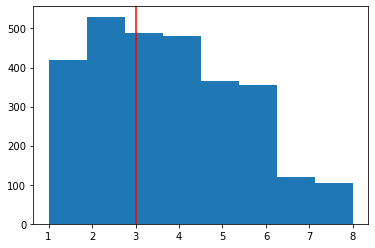

In [117]:
genfi_behav_dropkey["Total"] = genfi_behav_dropkey.groupby("Blinded Code")["Blinded Code"].transform('count')

# plot these values
plt.hist(genfi_behav_dropkey["Total"], bins=8)
plt.axvline(x=3, color = "red")

From the plot above, it looks like some 900+ data points that have 2+ occurrences. I have drawn a vertical red line at 3 to show the number of data points that have 3 and + occurrences.

In [118]:
# create a df copy so that you can retain only those who have more than 1 time point data
genfi_behav_dropkey_copy = genfi_behav_dropkey.copy()

genfi_behav_keeprows = genfi_behav_dropkey_copy.groupby('Blinded Code').filter(lambda x: len(x) > 1)

In [119]:
genfi_behav_keeprows["Blinded Code"].nunique()

710

In [120]:
genfi_behav_keeprows

,Blinded Code,Blinded Site,Visit,Date of assessment,Genetic Group,Mutation,Blinded Family,Genetic status 1,Genetic status 2,Awareness of genetic status,DOB,Gender,Handedness,Education,Employment,Ethnicity,Mean family AAO,Age at visit,EYO,Mother Affected,Diagnosis,AAO,AAD,Father Affected,Diagnosis.1,AAO.1,AAD.1,No_of_sibs,No_of_affected_sibs,Diagnosis_1,AAO_1,AAD_1,Diagnosis_2,AAO_2,AAD_2,Diagnosis_3,AAO_3,AAD_3,Diagnosis_4,AAO_4,AAD_4,Diagnosis_5,AAO_5,AAD_5,Diagnosis_6,AAO_6,AAD_6,Diagnosis_7,AAO_7,AAD_7,Diagnosis_8,AAO_8,AAD_8,Mean Family AAO,Affected,Age at Onset,First symptom,First symptom.1,First symptom.2,Rascovsky,Gorno-Tempini,El-Escorial,Affected.1,Disinhibition,Apathy,Empathy,OCD,Appetite,Affected.2,Vis_hal,Aud_hal,Tac_hal,Delusions,Depression,Anxiety,Affected.3,Artic,Fluency,Grammar,Retrieval,Repetition,Sent_comp,Word_comp,Dyslexia,Dysgraphia,Func_comm,Affected.4,Memory,Visuospatial,Judg_prob_solv,Attention,Affected.5,Dysarthria,Dysphagia,Tremor,Slowness,Weakness,Gait,Falls,Seizures,Stroke,TBI,Hypertension,Hyperchol,Diabetes,EMG,Supranuclear,Bulbar,Pseudobulbar,Myoclonus,Rest_tremor,Post_tremor,Dystonia,Bradykinesia,Rigidity,Limb_apraxia,Alien_limb,Fascic_UL,Fascic_LL,Spasticity_UL,Spasticity_LL,Weakness_UL,Weakness_LL,Hyperreflexia_UL,Hyperreflexia_LL,Ataxia,Abnormal_gait,Type,Severity,Memory.1,Everyday_Skills,Self_Care,Abnormal_Behaviour,Mood,Beliefs,Eating,Sleep,Stereotypic_Behaviour,Motivation,CBI_Total,FRS_%,ALSFRS_total,FTLD-CDR-SOB,FTLD-CDR-GLOBAL,CDR-SOB,GENFI-CDR-SOB,GENFI-CDR-GLOBAL,BEHAV-SOB,PASS-SOB,Behaviour,Emotions,Trusting,Neuropsych,Lability,Aggression,Euphoria,Aberr_motor,Hypersexuality,Hyperreligiousity,Humour,Language,Cognitive,Orientation,Comm_affairs,Hobbies,Personal_care,Person_recog,Topo_memory,Bradyphrenia,Motor,Hands,Affected.6,Autonomic,BP,Gastro,Thermo,Urinary,Pain,Affected.7,Sounds,Smell,Unexplained,Breathing,Smoking,Alcohol,Rec_drugs,Autoimmune,Drug_history,No_of_drugs,MMSE,Eyelid,Face_weakness,Neck_weakness,Neck_rigidity,Resp_weakness,Myoclonus_L,Myoclonus_R,Rest_tremor_L,Rest_tremor_R,Post_tremor_L,Post_tremor_R,Dystonia_L,Dystonia_R,Chorea_L,Chorea_R,Bradykinesia_UL_L,Bradykinesia_UL_R,Bradykinesia_LL_L,Bradykinesia_LL_R,Rigidity_L,Rigidity_R,Limb_apraxia_L,Limb_apraxia_R,Alien_limb_L,Alien_limb_R,Cortical_sensory_L,Cortical_sensory_R,Fascic_UL_L,Fascic_UL_R,Fascic_LL_L,Fascic_LL_R,Spasticity_UL_L,Spasticity_UL_R,Spasticity_LL_L,Spasticity_LL_R,Weakness_UL_L,Weakness_UL_R,Weakness_LL_L,Weakness_LL_R,Hyperreflexia_UL_L,Hyperreflexia_UL_R,Hyperreflexia_LL_L,Hyperreflexia_LL_R,Ataxia_UL_L,Ataxia_UL_R,Ataxia_LL_L,Ataxia_LL_R,Affected.8,Arising,Sitting,Post_instability,Sleep.1,mIRI_total,mIRI_EC,mIRI_PT,RSMS_total,RSMS_EX,RSMS_SP,Log_memory_immediate,DS_F_score,DS_F_max,DS_B_score,DS_B_max,TMTA_time,TMTA_errors,TMTA_lines,TMTB_time,TMTB_errors,TMTB_lines,Digit_symbol,Boston_naming,VF_animals,VF_vegetables,VF_F,VF_A,VF_S,Log_memory_delayed,Log_memory_time,Block_design,Benson_figure_copy,C+C,Benson_figure_recall,Copy_recall_time,Benson_recognition,FCRST_free,FCRST_total,Stroop_color_uerrors,Stroop_color_scerrors,Stroop_color_time,Stroop_word_uerrors,Stroop_word_scerrors,Stroop_word_time,Stroop_ink_uerrors,Stroop_ink_scerrors,Stroop_ink_time,FCRST_del_free,FCRST_del_total,Faux_pas_totalFP,Faux_pas_totalNFP,Faux_pas_totalALL,Faux_pas_SUBSCORE,Ekman_happiness,Ekman_surprise,Ekman_disgust,Ekman_fear,Ekman_anger,Ekman_sadness,Ekman_neutral,Ekman_all,Ekman_SUBSCORE,MiniSEA_total,Unnamed: 55,Source,Total
4,GRN001,GENFI_YD,1.0,2012-01-30,GRN,G35fs,FAM449,At-risk,0,Not aware,1984-03-14,Female,Left,16,0.0,0.0,56.0,27.879535,-28.120465,Affected,PPA,56.0,61.0,Unknown,NaN,NaN,NaN,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0